<a href="https://colab.research.google.com/github/Diwakarmogarala/Capstone/blob/main/Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/drive/u/0/folders/11zhBUqnUT6J4IVMLpBcrgz8saXAGJ7Hi

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pl.read_csv("/content/drive/MyDrive/Capstone Project/merged_data_with_prices.csv")

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# encoded = le.fit_transform(data["Age Group"].to_numpy())
# data = data.with_columns(
#     pl.Series("Age_Group", encoded, dtype=pl.Int32)
# )


In [ ]:
data.columns

['Hospital County',
 'Age Group',
 'Gender',
 'Race',
 'Ethnicity',
 'Type of Admission',
 'Patient Disposition',
 'APR DRG Description',
 'APR MDC Description',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Payment Typology 2',
 'Payment Typology 3',
 'Length of Stay',
 'Age_Group',
 'Total Charges',
 'Total Costs',
 'Age',
 'Year']

In [ ]:
data["Age_Group"].value_counts()

Age_Group,count
i64,u32
3,4376833
2,3033309
1,1498033
4,4549300
0,2212893


In [ ]:
data.head()

Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Length of Stay,Age_Group,Total Charges,Total Costs,Age,Year
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,f64,i64,i64
"""Allegany""","""70 or Older""","""F""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Medicare""","""Private Health Insurance""","""None""",3,4,3913.23,3466.83,4,2016
"""Allegany""","""30 to 49""","""M""","""White""","""Not Span/Hispanic""","""Elective""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Minor""","""Minor""","""Medical""","""Self-Pay""","""None""","""None""",2,2,3597.1,3746.8,2,2016
"""Allegany""","""50 to 69""","""F""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""chronic obstructive pulmonary …","""diseases and disorders of the …","""Minor""","""Minor""","""Medical""","""Medicare""","""Federal/State/Local/VA""","""None""",7,3,9149.22,8322.1,3,2016
"""Allegany""","""70 or Older""","""M""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Medicare""","""Medicaid""","""None""",4,4,5880.61,5828.87,4,2016
"""Allegany""","""50 to 69""","""M""","""White""","""Not Span/Hispanic""","""Elective""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Blue Cross/Blue Shield""","""None""","""None""",5,3,7019.76,6604.0,3,2016


In [ ]:
np.corrcoef(
        data["Total Charges"].to_numpy(),
        data["Age_Group"].to_numpy()
    )[0, 1]

np.float64(0.1117900031586466)

In [ ]:
data.columns

['Hospital County',
 'Age Group',
 'Gender',
 'Race',
 'Ethnicity',
 'Type of Admission',
 'Patient Disposition',
 'APR DRG Description',
 'APR MDC Description',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Payment Typology 2',
 'Payment Typology 3',
 'Length of Stay',
 'Age_Group',
 'Total Charges',
 'Total Costs',
 'Age',
 'Year']

In [ ]:
X = data[['Year',
          'Hospital County',
          'Age Group',
          'Gender',
          'Race',
          'Ethnicity',
          'Type of Admission',
          'Patient Disposition',
          'APR DRG Description',
          'APR MDC Description',
          'APR Severity of Illness Description',
          'APR Risk of Mortality',
          'APR Medical Surgical Description',
          'Payment Typology 1',
          'Payment Typology 2',
          'Payment Typology 3'
          ]]
y = data["Length of Stay"]

In [ ]:
X.dtypes

[Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(len(X.columns)):
    if X.dtypes[i] == X.dtypes[2]:
        encoded = le.fit_transform(X[X.columns[i]].to_numpy())
        X = X.with_columns(
            pl.Series(X.columns[i], encoded, dtype=pl.Int32)
            )


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [c for c, dt in zip(X.columns, X.dtypes) if dt == pl.Utf8]

encoded_series = []
for c in cat_cols:
    le = LabelEncoder()                                  # new encoder each col
    codes = le.fit_transform(X[c].to_numpy())            # NumPy 1-D
    encoded_series.append(pl.Series(c, codes, pl.Int32))

X = X.with_columns(encoded_series)


In [ ]:
# Export X (Polars DataFrame)
X.write_csv("X.csv")

# Wrap y (Polars Series) into a DataFrame before saving
pl.DataFrame({"Total Charges": y}).write_csv("y.csv")


ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/polars/dataframe/frame.py", line 775, in shape
    return self._df.shape()
           ^^^^^^^^^^^^^^^^
RuntimeError: Already mutably borrowed
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/polars/dataframe/frame.py", line 775, in shape
    return self._df.shape()
           ^^^^^^^^^^^^^^^^
RuntimeError: Already mutably borrowed
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call

In [ ]:
X.to_csv("/content/drive/MyDrive/Capstone Project/X.csv", index=False)
y.to_csv("/content/drive/MyDrive/Capstone Project/y.csv", index=False)

AttributeError: 'DataFrame' object has no attribute 'to_csv'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify = X["APR DRG Description"])

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import joblib
rf = RandomForestClassifier(
        n_estimators=0,          # start with no trees
        warm_start=True,         # lets us add trees later
        max_depth=None,
        n_jobs=-1,
        random_state=42,
        max_features="sqrt",     # speed, no big loss in perf
)

trees_per_chunk = 25
total_trees     = 200            # tune later
for step in range(0, total_trees, trees_per_chunk):
    rf.n_estimators += trees_per_chunk
    rf.fit(X_train, y_train)     # reuse the full data
    joblib.dump(rf, "/content/drive/MyDrive/rf_ckpt.pkl")   # ✅ survives disconnect
    print(f"{rf.n_estimators} trees built")

# reload after reconnect:
# rf = joblib.load("/content/drive/MyDrive/rf_ckpt.pkl")


In [ ]:
!pip install -q rapidsai-cu12 pylibraft-cu12 --extra-index-url=https://pypi.nvidia.com
import cudf, cuml

ERROR: Could not find a version that satisfies the requirement rapidsai-cu12 (from versions: none)
ERROR: No matching distribution found for rapidsai-cu12


In [ ]:
import cudf

# X_train is Polars, already numeric / label-encoded
Xc = cudf.DataFrame.from_arrow(X_train.to_arrow())   # zero-copy to GPU
yc = cudf.Series(y_train.to_numpy())                 # 1-D target

from cuml.ensemble import RandomForestClassifier

rf_gpu = RandomForestClassifier(
             n_estimators=400,
             max_depth=25,
             n_streams=8,        # “threads” on the GPU
)
rf_gpu.fit(Xc, yc)

pred = rf_gpu.predict(cudf.DataFrame.from_arrow(X_test.to_arrow()))


In [ ]:
# prompt: know my cores

import multiprocessing

num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 8


In [ ]:
from transformers import AutoTokenizer

MODEL_NAME = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tok = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import dask

In [ ]:
from dask.distributed import Client

client = Client(n_workers=8, threads_per_worker=2, memory_limit="45GB")
client


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43931
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36187'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36143'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42127'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33183'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32845'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37067'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36351'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43819'
INFO:distributed.scheduler:Register wor

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 16,Total memory: 335.28 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43931,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 335.28 GiB
Comm: tcp://127.0.0.1:38505,Total threads: 2
Dashboard: http://127.0.0.1:36697/status,Memory: 41.91 GiB
Nanny: tcp://127.0.0.1:36187,


In [ ]:
# https://drive.google.com/drive/u/0/folders/11zhBUqnUT6J4IVMLpBcrgz8saXAGJ7Hi

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from xgboost import XGBRegressor

In [ ]:
# https://drive.google.com/drive/u/0/folders/11zhBUqnUT6J4IVMLpBcrgz8saXAGJ7Hi
import joblib
from google.colab import drive
drive.mount('/content/drive')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pl
X = pl.read_csv("/content/drive/MyDrive/Capstone Project/X.csv")
y = pl.read_csv("/content/drive/MyDrive/Capstone Project/y.csv")
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2016], y[X["Year"]==2016], test_size=0.5, random_state=42,stratify=X[X["Year"]==2016]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2016.pkl")
r2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.41969311237335205

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2017], y[X["Year"]==2017], test_size=0.5, random_state=42, stratify=X[X["Year"]==2017]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2017.pkl")
r2

0.4256724715232849

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2018], y[X["Year"]==2018], test_size=0.5, random_state=42, stratify=X[X["Year"]==2018]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2018.pkl")
r2

0.42332279682159424

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2019], y[X["Year"]==2019], test_size=0.5, random_state=42, stratify=X[X["Year"]==2019]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2019.pkl")
r2

0.4203885793685913

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2020], y[X["Year"]==2020], test_size=0.5, random_state=42, stratify=X[X["Year"]==2020]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2020.pkl")
r2

0.4422503709793091

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2021], y[X["Year"]==2021], test_size=0.5, random_state=42, stratify=X[X["Year"]==2021]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2021.pkl")
r2

0.461844801902771

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X["Year"]==2022], y[X["Year"]==2022], test_size=0.5, random_state=42, stratify=X[X["Year"]==2022]['APR DRG Description'])
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2022.pkl")
r2

0.4254606366157532

In [ ]:
# https://drive.google.com/drive/u/0/folders/11zhBUqnUT6J4IVMLpBcrgz8saXAGJ7Hi
import joblib
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pl
X = pl.read_csv("/content/drive/MyDrive/Capstone Project/X.csv")
y = pl.read_csv("/content/drive/MyDrive/Capstone Project/y.csv")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=X['APR DRG Description'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from xgboost import XGBRegressor
model = KNeighborsRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/KNN_regressor_2016_2022.pkl")
r2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)


39.324485778808594

In [ ]:
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
model = XGBRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2016_2022.pkl")
r2

Learning rate set to 0.168826
0:	learn: 7.9281167	total: 356ms	remaining: 5m 56s
1:	learn: 7.6977610	total: 619ms	remaining: 5m 9s
2:	learn: 7.5289268	total: 886ms	remaining: 4m 54s
3:	learn: 7.3950059	total: 1.16s	remaining: 4m 49s
4:	learn: 7.2850467	total: 1.45s	remaining: 4m 48s
5:	learn: 7.2119394	total: 1.71s	remaining: 4m 43s
6:	learn: 7.1392155	total: 1.97s	remaining: 4m 39s
7:	learn: 7.0809061	total: 2.27s	remaining: 4m 40s
8:	learn: 7.0370918	total: 2.53s	remaining: 4m 38s
9:	learn: 7.0023018	total: 2.8s	remaining: 4m 37s
10:	learn: 6.9713825	total: 3.05s	remaining: 4m 34s
11:	learn: 6.9315726	total: 3.32s	remaining: 4m 33s
12:	learn: 6.9079504	total: 3.58s	remaining: 4m 32s
13:	learn: 6.8882598	total: 3.84s	remaining: 4m 30s
14:	learn: 6.8711355	total: 4.11s	remaining: 4m 29s
15:	learn: 6.8538448	total: 4.39s	remaining: 4m 30s
16:	learn: 6.8372173	total: 4.68s	remaining: 4m 30s
17:	learn: 6.8255273	total: 4.96s	remaining: 4m 30s
18:	learn: 6.8112947	total: 5.21s	remaining: 4

0.4367115035054613

In [ ]:
mse

38.238963755701924

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.7 MB/s eta 0:00:00


In [ ]:
import joblib
from google.colab import drive
drive.mount('/content/drive')
import pandas as pl

Mounted at /content/drive


In [ ]:

# m = joblib.load("/content/drive/MyDrive/Capstone Project/XGB_regressor_2016_2022.pkl")

In [ ]:
# m.feature_importances_

In [ ]:
X = pl.read_csv("/content/drive/MyDrive/Capstone Project/X.csv")
y = pl.read_csv("/content/drive/MyDrive/Capstone Project/y.csv")

In [ ]:
X.columns

Index(['Year', 'Hospital County', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Type of Admission', 'Patient Disposition', 'APR DRG Description',
       'APR MDC Description', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3'],
      dtype='object')

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
model = XGBRegressor()
# model.fit(x_train, y_train)

# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# prompt: export model as pkl using joblib to my drive Capstone Project

# joblib.dump(model, "/content/drive/MyDrive/Capstone Project/XGB_regressor_2016_2022.pkl")
# r2

In [ ]:
# model.feature_importances_

In [ ]:
X.select_dtypes(include=['int64', 'float64']).skew()


,0
Year,0.070025
Hospital County,-0.049598
Age Group,-0.562553
Gender,0.196833
Race,-1.129021
Ethnicity,1.870008
Type of Admission,2.176036
Patient Disposition,1.836245
APR DRG Description,-0.010946
APR MDC Description,0.239730


In [ ]:
Z = X.drop(columns=['Ethnicity', "Payment Typology 3","Hospital County", "Year"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.5, random_state=42, stratify=y)
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.4102802872657776

In [ ]:
mse

40.033260345458984

In [ ]:
X.describe()

,Year,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3
count,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07,1.567037e+07
mean,2.018908e+03,2.727710e+01,2.481904e+00,4.513830e-01,2.179638e+00,1.281721e+00,1.225039e+00,9.530267e+00,3.132056e+02,1.579407e+01,1.967692e+00,1.888226e+00,4.854503e-01,4.448475e+00,6.005042e+00,7.081841e+00
std,1.992472e+00,1.458250e+01,1.367034e+00,4.977497e-01,1.120885e+00,5.944323e-01,1.204376e+00,3.610083e+00,1.878730e+02,9.696853e+00,9.737909e-01,8.233748e-01,8.573469e-01,1.910348e+00,2.130413e+00,1.164971e+00
min,2.016000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,2.100000e+01,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,1.310000e+02,6.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00
50%,2.019000e+03,2.600000e+01,3.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,3.400000e+02,1.500000e+01,2.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00
75%,2.021000e+03,3.800000e+01,4.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,4.990000e+02,2.500000e+01,3.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00
max,2.022000e+03,5.700000e+01,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,1.900000e+01,6.060000e+02,3.400000e+01,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Hospital County'].plot(kind='hist', bins=20, title='Hospital County')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age Group'].plot(kind='hist', bins=20, title='Age Group')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Hospital County', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Hospital County', y='Age Group', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age Group', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Gender', y='Race', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Hospital County']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Hospital County')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Age Group']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Age Group')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Race']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Race')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Hospital County'].plot(kind='line', figsize=(8, 4), title='Hospital County')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age Group'].plot(kind='line', figsize=(8, 4), title='Age Group')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X["Type of Admission"].value_counts()

,count
Type of Admission,
1,10164616
0,2804456
2,1467133
5,1169189
4,57057
3,7917


In [ ]:
z = pl.concat([Z,y], axis = 1)

In [ ]:
y

,Total Charges
0,3
1,2
2,7
3,4
4,5
...,...
15670363,125
15670364,21
15670365,3
15670366,8


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Z = pl.concat([X,y], axis = 1)
Z = X.drop(columns=['Ethnicity', "Payment Typology 3","Hospital County", "Year"], axis=1)
us = RandomUnderSampler(random_state=42)
X_us,y_us= us.fit_resample(Z, Z["APR Medical Surgical Description"])
Z_us  =  pl.concat([X_us,y_us], axis = 1)
Z_us

,Age Group,Gender,Race,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,APR Medical Surgical Description
7883976,2,0,2,5,8,594,32,2,2,0,4,4,0
13905015,3,1,3,5,8,269,15,0,0,0,0,7,0
2986674,4,1,2,1,19,255,5,3,3,0,5,0,0
3177595,2,0,3,0,8,594,32,2,2,0,4,7,0
2143885,4,1,3,1,8,602,17,3,3,0,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989409,1,1,3,1,8,423,17,2,2,2,6,8,2
4335247,2,0,0,0,8,79,32,1,2,2,7,7,2
13178903,2,0,3,1,8,272,5,3,2,2,0,7,2
10749801,2,0,0,1,8,518,32,3,2,2,3,7,2


In [ ]:
y

,Total Charges
0,3
1,2
2,7
3,4
4,5
...,...
15670363,125
15670364,21
15670365,3
15670366,8


In [ ]:
Z = pl.concat([X,y], axis = 1)
Z = Z.drop(columns=['Ethnicity', "Payment Typology 3","Hospital County", "Year"], axis=1)
Z

,Age Group,Gender,Race,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Total Charges
0,4,0,3,5,8,463,15,3,3,0,5,8,3
1,2,1,3,0,8,463,15,2,2,0,8,7,2
2,3,0,3,5,8,90,15,2,2,0,5,2,7
3,4,1,3,5,8,463,15,3,3,0,5,4,4
4,3,1,3,0,8,463,15,3,3,0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670363,1,1,2,1,8,203,4,0,1,0,4,7,125
15670364,3,1,2,1,8,544,21,1,1,0,4,7,21
15670365,3,1,2,1,18,285,9,3,2,0,4,7,3
15670366,2,0,2,1,18,22,9,1,3,0,4,7,8


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# us = RandomUnderSampler(random_state=42)
# drop = "Type of Admission"
# X_us,y_us= us.fit_resample(Z, X[drop])
# Z_us  =  pl.concat([X_us,y_us], axis = 1)
# Z_us = Z_us.drop(columns=[drop], axis=1)

In [ ]:
# Z_mod = Z[Z["APR Risk of Mortality"]==0]
# X = Z_mod.drop(columns=["Total Charges"], axis=1)
# Z_mod.shape

(1204363, 13)

In [ ]:
Z_us

,Age Group,Gender,Race,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Total Charges
259252,2,1,3,8,419,14,2,2,0,4,4,2
231091,4,0,3,8,499,4,2,2,2,5,7,2
421706,3,0,3,8,468,15,2,2,2,0,7,4
538309,3,1,3,19,388,29,1,1,2,5,7,18
91474,4,1,3,9,271,5,1,1,2,5,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
345013,4,0,3,19,264,9,0,0,2,5,5,16
87603,3,0,3,13,385,14,1,1,0,5,5,6
1044422,3,1,2,8,563,4,2,2,0,4,4,2
1155253,2,1,0,8,542,14,3,3,0,4,4,2


In [ ]:
# Z_mod = Z[Z["APR Medical Surgical Description"]==2]
# X = Z_mod.drop(columns=["Total Charges"], axis=1)
# y = Z_mod["Total Charges"]
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor( )
# model.fit(x_train, y_train)

# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# r2

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.47668878749662935

In [ ]:
# x_train

,Age Group,Gender,Race,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2
8599096,0,0,3,0,9,132,13,1,3,2,4,4
9598040,2,0,0,0,8,81,32,2,2,2,7,9
4733715,2,1,2,0,8,227,10,3,2,2,7,7
6839976,3,0,3,1,8,587,8,3,2,2,7,9
12546576,4,0,3,0,19,73,4,3,3,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9489960,2,0,1,0,8,525,18,3,2,2,0,8
14430148,3,1,3,0,9,142,13,2,2,2,7,5
8879554,2,0,3,0,8,79,32,2,2,2,0,7
11264387,3,1,1,0,8,500,14,3,3,2,5,7


In [ ]:
Z = Z.drop(columns=['Ethnicity', "Payment Typology 3","Hospital County", "Year"], axis=1)
from xgboost import XGBRegressor

model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', n_estimators=100, random_state=42)
model.fit(x_train, y_train)

metrics ={"Group":[], "MSE":[], "R2":[]}
for i in Z["APR MDC Description"].unique():
    Z_mod = Z[Z["APR MDC Description"]==i]
    X = Z_mod.drop(columns=["Total Charges"], axis=1)
    y = Z_mod["Total Charges"]
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    from sklearn.neural_network import MLPRegressor
    model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', n_estimators=100, random_state=42)
    model.fit(x_train, y_train)


    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics["Group"].append(i)
    metrics["MSE"].append(mse)
    metrics["R2"].append(r2)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:41:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:41:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:41:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:41:

In [ ]:
data = pl.DataFrame(metrics)

In [ ]:
data[data['Group']==34]

,Unnamed: 0,Group,MSE,R2
34,34,34,69.031265,-1.351201


In [ ]:
data.to_csv("metrics.csv")

In [ ]:
df = pl.read_csv("/content/drive/MyDrive/Capstone Project/merged_data_with_prices.csv")

In [ ]:
apr_mdc_description = df["APR MDC Description"].value_counts().reset_index().sort_values(by="APR MDC Description")
apr_mdc_description

,APR MDC Description,count
11,alcohol/drug use and alcohol/drug induced orga...,488868
31,burns,13805
22,"diseases and disorders of blood, blood forming...",66860
16,diseases and disorders of the blood and blood ...,152144
0,diseases and disorders of the circulatory system,1960456
4,diseases and disorders of the digestive system,1230397
19,"diseases and disorders of the ear, nose, mouth...",136892
30,diseases and disorders of the eye,24641
17,diseases and disorders of the female reproduct...,142178
12,diseases and disorders of the hepatobiliary sy...,437224


In [ ]:
Z["APR MDC Description"].value_counts().reset_index().sort_values(by="APR MDC Description")

,APR MDC Description,count
11,0,488868
31,1,13805
22,2,66860
16,3,152144
0,4,1960456
4,5,1230397
19,6,136892
30,7,24641
17,8,142178
12,9,437224


In [ ]:
data = pl.read_csv("metrics.csv")

In [ ]:
data = data.sort_values(by="Group", ascending=True)
data = data[data["Group"]<34]
data


,Unnamed: 0,Group,MSE,R2
17,17,0,29.130890,0.422710
22,22,1,89.669197,0.490288
19,19,2,31.784836,0.294978
31,31,3,35.516129,0.317703
11,11,4,26.133385,0.456696
5,5,5,24.735601,0.412269
32,32,6,21.934822,0.377439
23,23,7,28.715952,0.084599
13,13,8,17.326811,0.349872
14,14,9,30.205942,0.393486


In [ ]:
data["Apr MDC Description"] = apr_mdc_description["APR MDC Description"]
data["Count"] = apr_mdc_description["count"]

In [ ]:
del data["Unnamed: 0"]

In [ ]:
data.to_csv("metrics.csv")

In [ ]:
df

,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,...,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Length of Stay,Age_Group,Total Charges,Total Costs,Age,Year
0,Allegany,70 or Older,F,White,Not Span/Hispanic,Urgent,Home or Self Care,other pneumonia,diseases and disorders of the respiratory system,Moderate,...,Medical,Medicare,Private Health Insurance,NaN,3,4,3913.23,3466.83,4,2016
1,Allegany,30 to 49,M,White,Not Span/Hispanic,Elective,Home or Self Care,other pneumonia,diseases and disorders of the respiratory system,Minor,...,Medical,Self-Pay,NaN,NaN,2,2,3597.10,3746.80,2,2016
2,Allegany,50 to 69,F,White,Not Span/Hispanic,Urgent,Home or Self Care,chronic obstructive pulmonary disease,diseases and disorders of the respiratory system,Minor,...,Medical,Medicare,Federal/State/Local/VA,NaN,7,3,9149.22,8322.10,3,2016
3,Allegany,70 or Older,M,White,Not Span/Hispanic,Urgent,Home or Self Care,other pneumonia,diseases and disorders of the respiratory system,Moderate,...,Medical,Medicare,Medicaid,NaN,4,4,5880.61,5828.87,4,2016
4,Allegany,50 to 69,M,White,Not Span/Hispanic,Elective,Home or Self Care,other pneumonia,diseases and disorders of the respiratory system,Moderate,...,Medical,Blue Cross/Blue Shield,NaN,NaN,5,3,7019.76,6604.00,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670363,Manhattan,18 to 29,M,Other Race,Spanish/Hispanic,Emergency,Home or Self Care,hypertension,diseases and disorders of the circulatory system,Extreme,...,Medical,Medicaid,NaN,NaN,125,1,2377798.00,892866.00,1,2022
15670364,Manhattan,50 to 69,M,Other Race,Unknown,Emergency,Home or Self Care,septicemia and disseminated infections,infectious and parasitic diseases systemic or ...,Major,...,Medical,Medicaid,NaN,NaN,21,3,262687.10,236947.70,3,2022
15670365,Manhattan,50 to 69,M,Other Race,Unknown,Emergency,Short-term Hospital,malignancy of hepatobiliary system and pancreas,diseases and disorders of the hepatobiliary sy...,Moderate,...,Medical,Medicaid,NaN,NaN,3,3,67719.07,61083.62,3,2022
15670366,Manhattan,30 to 49,F,Other Race,Spanish/Hispanic,Emergency,Short-term Hospital,alcoholic liver disease,diseases and disorders of the hepatobiliary sy...,Major,...,Medical,Medicaid,NaN,NaN,8,2,66464.56,59952.03,2,2022


In [ ]:
X

,Year,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3
0,2016,1,4,0,3,1,5,8,463,15,3,3,0,5,8,7
1,2016,1,2,1,3,1,0,8,463,15,2,2,0,8,7,7
2,2016,1,3,0,3,1,5,8,90,15,2,2,0,5,2,7
3,2016,1,4,1,3,1,5,8,463,15,3,3,0,5,4,7
4,2016,1,3,1,3,1,0,8,463,15,3,3,0,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670363,2022,25,1,1,2,2,1,8,203,4,0,1,0,4,7,7
15670364,2022,25,3,1,2,3,1,8,544,21,1,1,0,4,7,7
15670365,2022,25,3,1,2,3,1,18,285,9,3,2,0,4,7,7
15670366,2022,25,2,0,2,2,1,18,22,9,1,3,0,4,7,7


In [ ]:
X = pl.concat([X, df["Length of Stay"]],axis = 1)
y= df["Total Charges"]

In [ ]:
Z = pl.concat([X,y], axis = 1)

In [ ]:
Z

,Year,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Length of Stay,Total Charges
0,2016,1,4,0,3,1,5,8,463,15,3,3,0,5,8,7,3,3913.23
1,2016,1,2,1,3,1,0,8,463,15,2,2,0,8,7,7,2,3597.10
2,2016,1,3,0,3,1,5,8,90,15,2,2,0,5,2,7,7,9149.22
3,2016,1,4,1,3,1,5,8,463,15,3,3,0,5,4,7,4,5880.61
4,2016,1,3,1,3,1,0,8,463,15,3,3,0,0,7,7,5,7019.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670363,2022,25,1,1,2,2,1,8,203,4,0,1,0,4,7,7,125,2377798.00
15670364,2022,25,3,1,2,3,1,8,544,21,1,1,0,4,7,7,21,262687.10
15670365,2022,25,3,1,2,3,1,18,285,9,3,2,0,4,7,7,3,67719.07
15670366,2022,25,2,0,2,2,1,18,22,9,1,3,0,4,7,7,8,66464.56


In [ ]:
Z = pl.concat([X,y], axis = 1)
Z = Z.drop(columns=['Ethnicity', "Payment Typology 3","Hospital County", "Year"], axis=1)
from xgboost import XGBRegressor

model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', n_estimators=100, random_state=42)
model.fit(x_train, y_train)

metrics ={"Group":[], "MSE":[], "R2":[]}
for i in Z["APR MDC Description"].unique():
    Z_mod = Z[Z["APR MDC Description"]==i]
    X = Z_mod.drop(columns=["Total Charges"], axis=1)
    y = Z_mod["Total Charges"]
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    from sklearn.neural_network import MLPRegressor
    model = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', n_estimators=100, random_state=42)
    model.fit(x_train, y_train)


    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics["Group"].append(i)
    metrics["MSE"].append(mse)
    metrics["R2"].append(r2)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:39:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:39:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:39:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:39:

In [ ]:
charges_metrics = pl.DataFrame(metrics)

In [ ]:
charges_metrics

,Group,MSE,R2
0,15,5.924289e+09,0.686013
1,16,2.212825e+09,0.448495
2,22,4.847236e+09,0.687610
3,33,1.958318e+09,0.567299
4,25,2.238186e+09,0.630006
5,5,3.823939e+09,0.622021
6,18,2.242265e+09,0.624924
7,10,3.447250e+09,0.654657
8,14,7.006922e+09,0.640129
9,12,2.110979e+09,0.550659


In [ ]:
data = charges_metrics.sort_values(by="Group", ascending=True)
data = data[data["Group"]<34]
data


,Group,MSE,R2
17,0,2.161111e+09,0.324925
22,1,4.130464e+10,0.622490
19,2,4.062031e+09,0.603820
31,3,8.411983e+09,0.610766
11,4,6.877288e+09,0.722512
5,5,3.823939e+09,0.622021
32,6,3.629304e+09,0.610331
23,7,2.652568e+09,0.307860
13,8,4.242582e+09,0.379196
14,9,5.545268e+09,0.695349


In [ ]:
apr_mdc_description = df["APR MDC Description"].value_counts().reset_index().sort_values(by="APR MDC Description")
apr_mdc_description.reset_index(inplace=True)
del apr_mdc_description["index"]


In [ ]:
data["Apr MDC Description"] = apr_mdc_description["APR MDC Description"]
data["Count"] = apr_mdc_description["count"]

In [ ]:
data

,index,Group,MSE,R2,Apr MDC Description,Count
0,17,0,2.161111e+09,0.324925,diseases and disorders of the female reproduct...,142178
1,22,1,4.130464e+10,0.622490,"diseases and disorders of blood, blood forming...",66860
2,19,2,4.062031e+09,0.603820,"diseases and disorders of the ear, nose, mouth...",136892
3,31,3,8.411983e+09,0.610766,burns,13805
4,11,4,6.877288e+09,0.722512,alcohol/drug use and alcohol/drug induced orga...,488868
5,5,5,3.823939e+09,0.622021,diseases and disorders of the nervous system,1035621
6,32,6,3.629304e+09,0.610331,pre mdc,1986
7,23,7,2.652568e+09,0.307860,diseases and disorders of the male reproductiv...,65322
8,13,8,4.242582e+09,0.379196,diseases and disorders of the musculoskeletal ...,415890
9,14,9,5.545268e+09,0.695349,"diseases and disorders of the skin, subcutaneo...",360877


In [ ]:
data.to_csv("Charges_metrics.csv")

In [ ]:
sorted_APR_MDC = data["Apr MDC Description"].sort_values(by="APR MDC Description", ascending=True)

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/merged_data_with_prices.csv")

In [4]:
!pip install geopandas

In [8]:
county_case_counts  = df["Hospital County"].value_counts().reset_index()
county_case_counts.columns = ["NAME", "cases"]


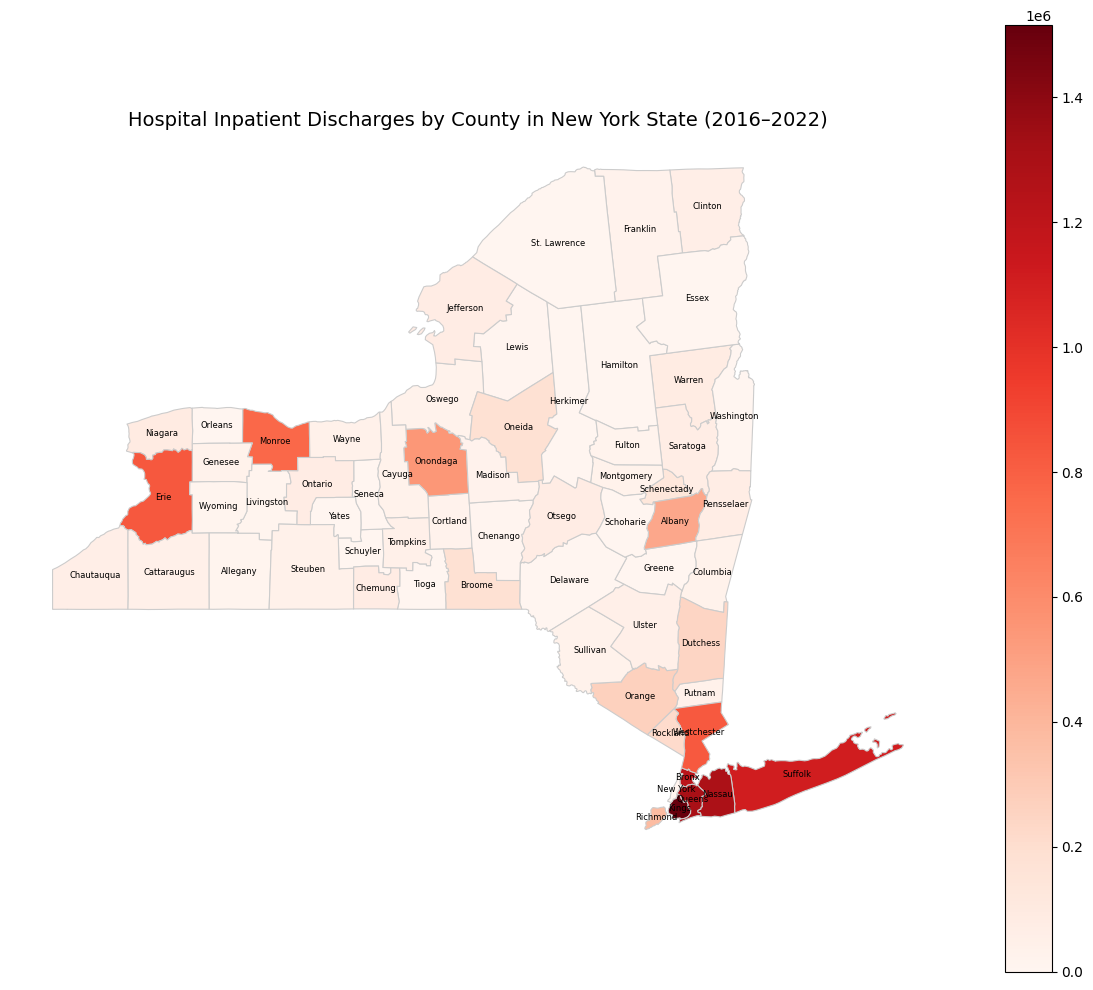

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load shapefile
gdf = gpd.read_file("cb_2022_us_county_5m.shp")

# Step 2: Filter New York State (FIPS = 36)
ny_gdf = gdf[gdf['STATEFP'] == '36'].copy()
## Overall
county_case_counts  = df["Hospital County"].value_counts().reset_index()
county_case_counts.columns = ["NAME", "cases"]

# Step 4: Merge and fill missing values
ny_gdf = ny_gdf.merge(county_case_counts, on='NAME', how='left')
ny_gdf['cases'] = ny_gdf['cases'].fillna(0)

# Step 5: Plot map
fig, ax = plt.subplots(figsize=(12, 10))
normalize = Normalize(vmin=ny_gdf['cases'].min(), vmax=ny_gdf['cases'].max())

ny_gdf.plot(
    column='cases',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    norm=normalize
)

# Step 6: Add labels for all counties
for idx, row in ny_gdf.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        row['NAME'],
        fontsize=6,
        ha='center',
        va='center',
        color='black'
    )

# Step 7: Final adjustments
ax.set_title("Hospital Inpatient Discharges by County in New York State (2016–2022)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [34]:
df["Age Group"].unique()

array(['70 or Older', '30 to 49', '50 to 69', '18 to 29', '0 to 17'],
      dtype=object)

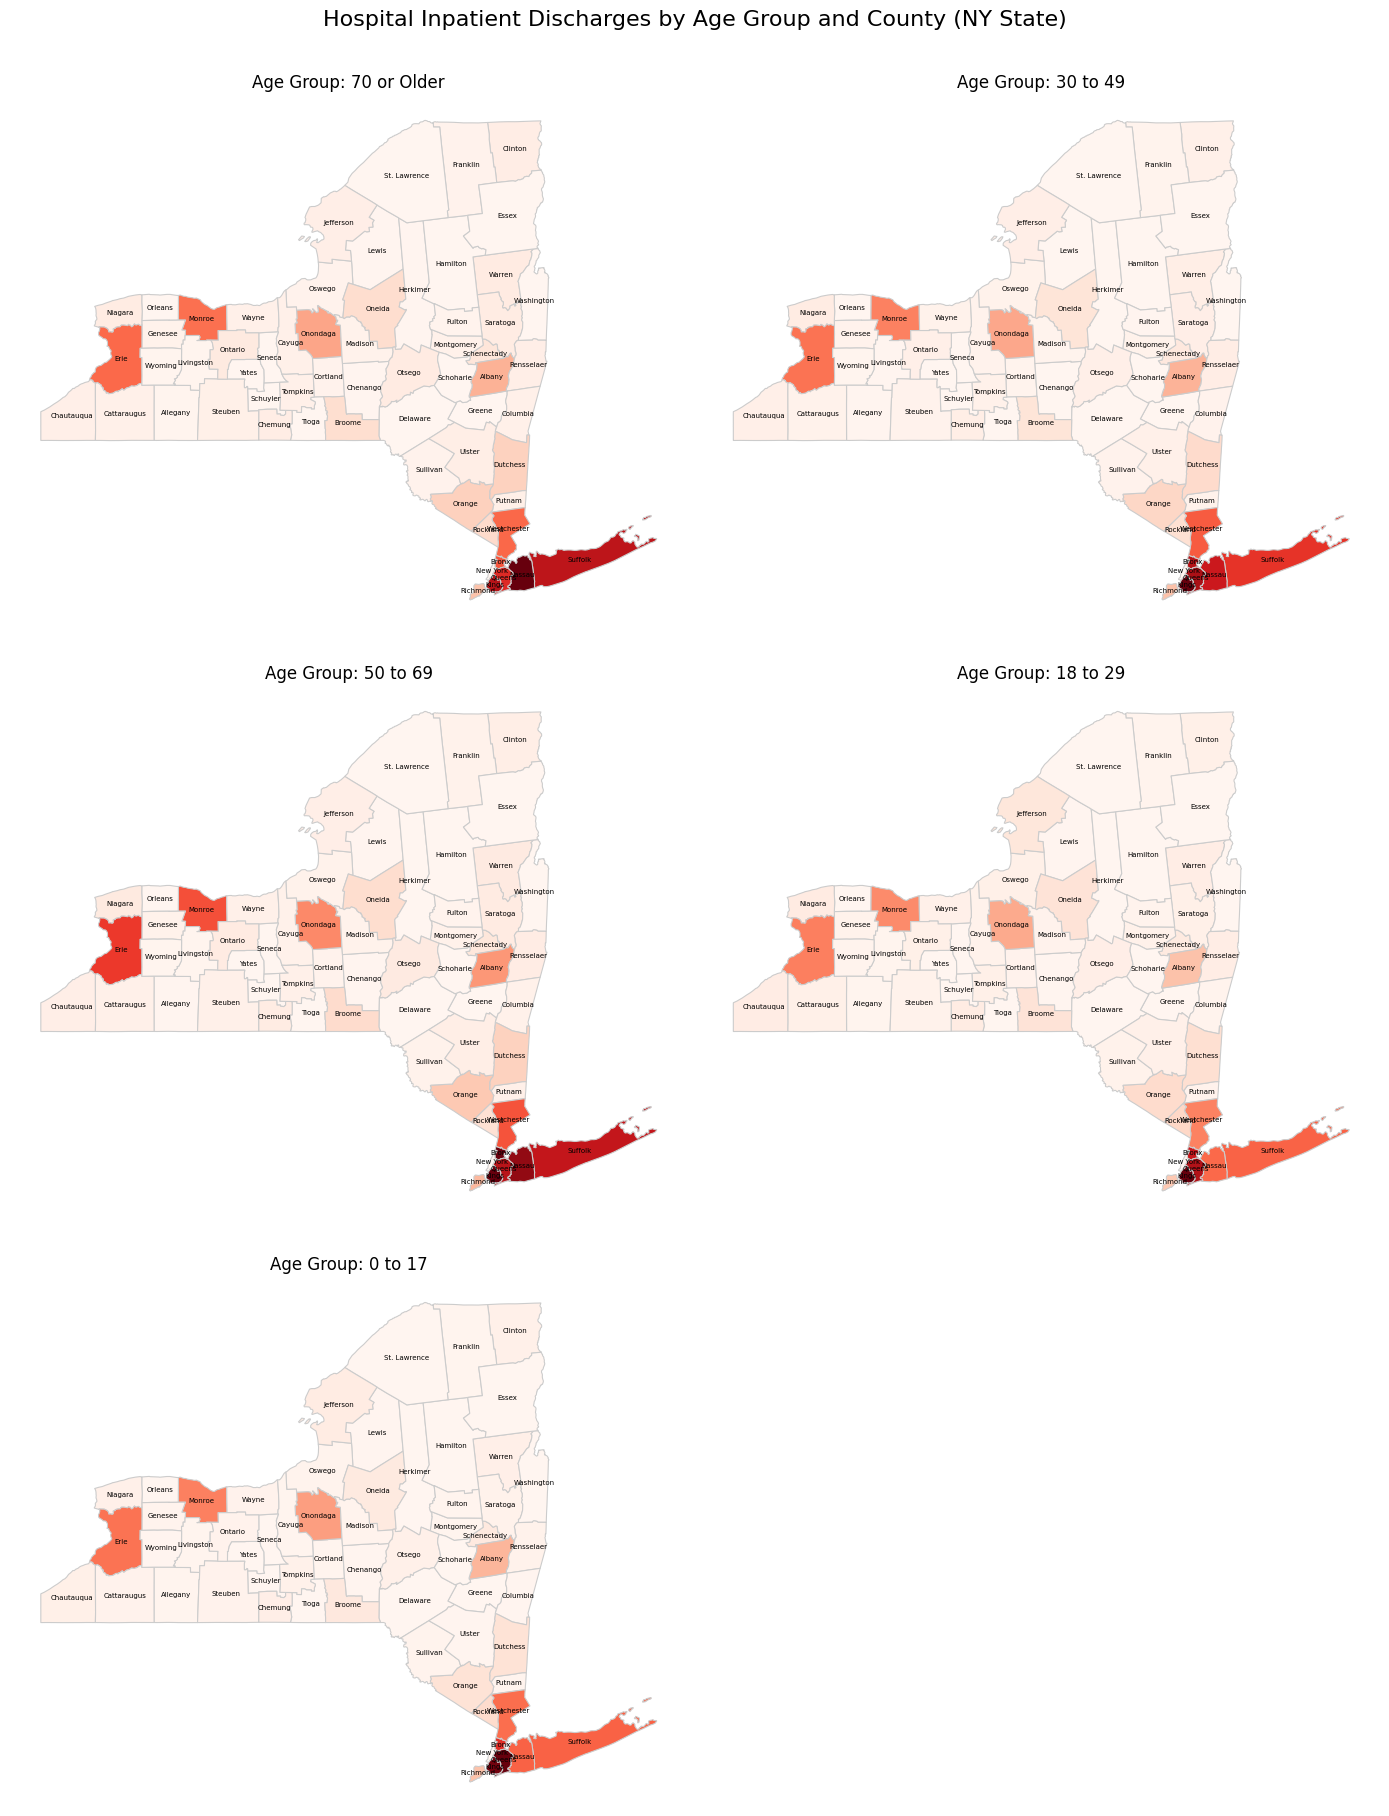

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load shapefile
gdf = gpd.read_file("cb_2022_us_county_5m.shp")
ny_gdf_base = gdf[gdf['STATEFP'] == '36'].copy()

# Unique age groups from your DataFrame
age_groups = df["Age Group"].unique()

# Create subplot grid
n = len(age_groups)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()  # Flatten in case of single row

# Loop through each age group
for i, age_group in enumerate(age_groups):
    ax = axes[i]

    # Filter and count cases
    county_case_counts = df[df["Age Group"] == age_group]["Hospital County"].value_counts().reset_index()
    county_case_counts.columns = ["NAME", "cases"]

    # Merge with shapefile
    ny_gdf = ny_gdf_base.copy()
    ny_gdf = ny_gdf.merge(county_case_counts, on='NAME', how='left')
    ny_gdf['cases'] = ny_gdf['cases'].fillna(0)

    # Normalize color scale
    normalize = Normalize(vmin=ny_gdf['cases'].min(), vmax=ny_gdf['cases'].max())

    # Plot
    ny_gdf.plot(
        column='cases',
        cmap='Reds',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=False,
        norm=normalize
    )

    # Label counties
    for idx, row in ny_gdf.iterrows():
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            row['NAME'],
            fontsize=5,
            ha='center',
            va='center',
            color='black'
        )

    ax.set_title(f"Age Group: {age_group}", fontsize=12)
    ax.axis('off')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Hospital Inpatient Discharges by Age Group and County (NY State)", fontsize=16, y=1.02)
plt.show()


In [30]:
county_case_counts

,NAME,cases


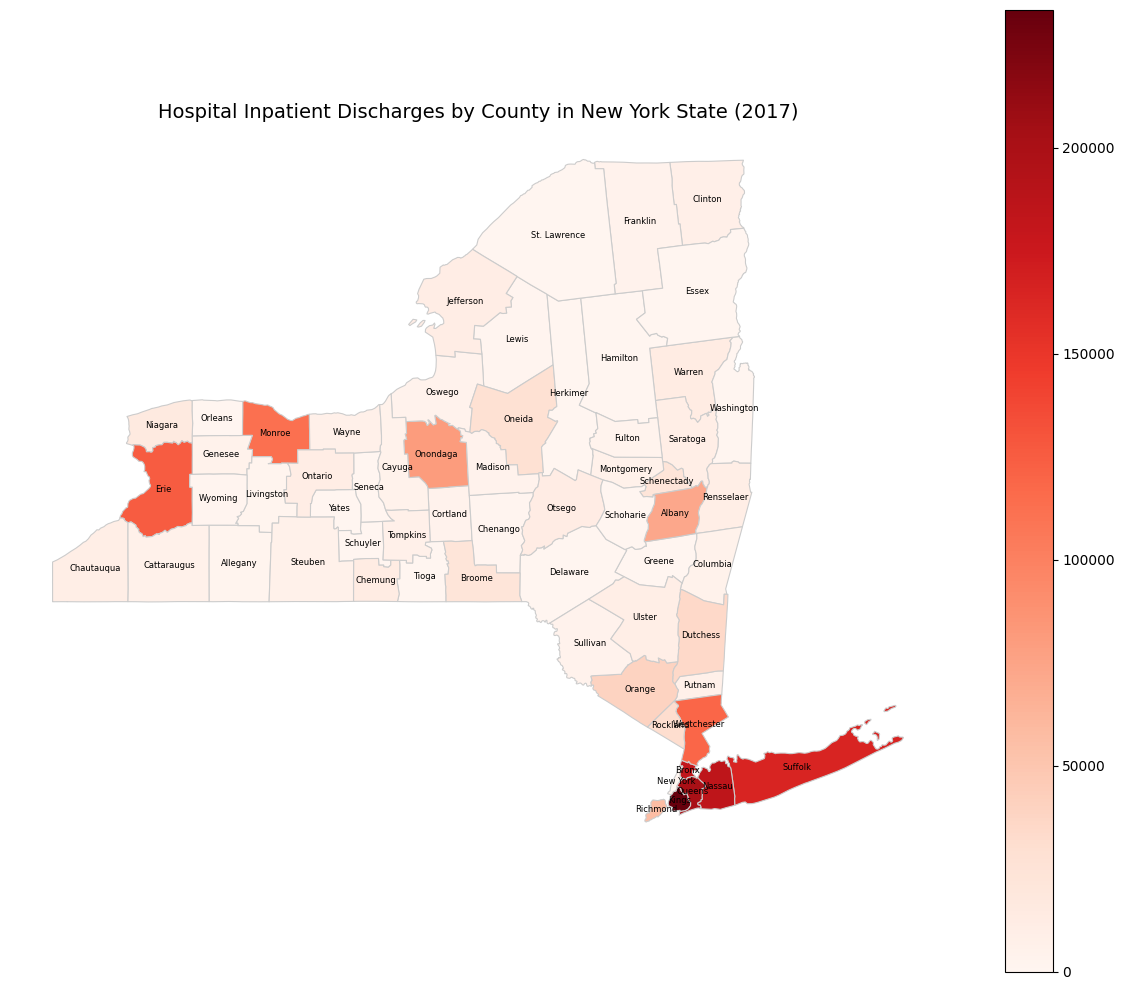

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load shapefile
gdf = gpd.read_file("cb_2022_us_county_5m.shp")

# Step 2: Filter New York State (FIPS = 36)
ny_gdf = gdf[gdf['STATEFP'] == '36'].copy()
## Overall
county_case_counts  = df[df["Year"]==2017]["Hospital County"].value_counts().reset_index()
county_case_counts.columns = ["NAME", "cases"]

# Step 4: Merge and fill missing values
ny_gdf = ny_gdf.merge(county_case_counts, on='NAME', how='left')
ny_gdf['cases'] = ny_gdf['cases'].fillna(0)

# Step 5: Plot map
fig, ax = plt.subplots(figsize=(12, 10))
normalize = Normalize(vmin=ny_gdf['cases'].min(), vmax=ny_gdf['cases'].max())

ny_gdf.plot(
    column='cases',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    norm=normalize
)

# Step 6: Add labels for all counties
for idx, row in ny_gdf.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        row['NAME'],
        fontsize=6,
        ha='center',
        va='center',
        color='black'
    )

# Step 7: Final adjustments
ax.set_title("Hospital Inpatient Discharges by County in New York State (2017)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


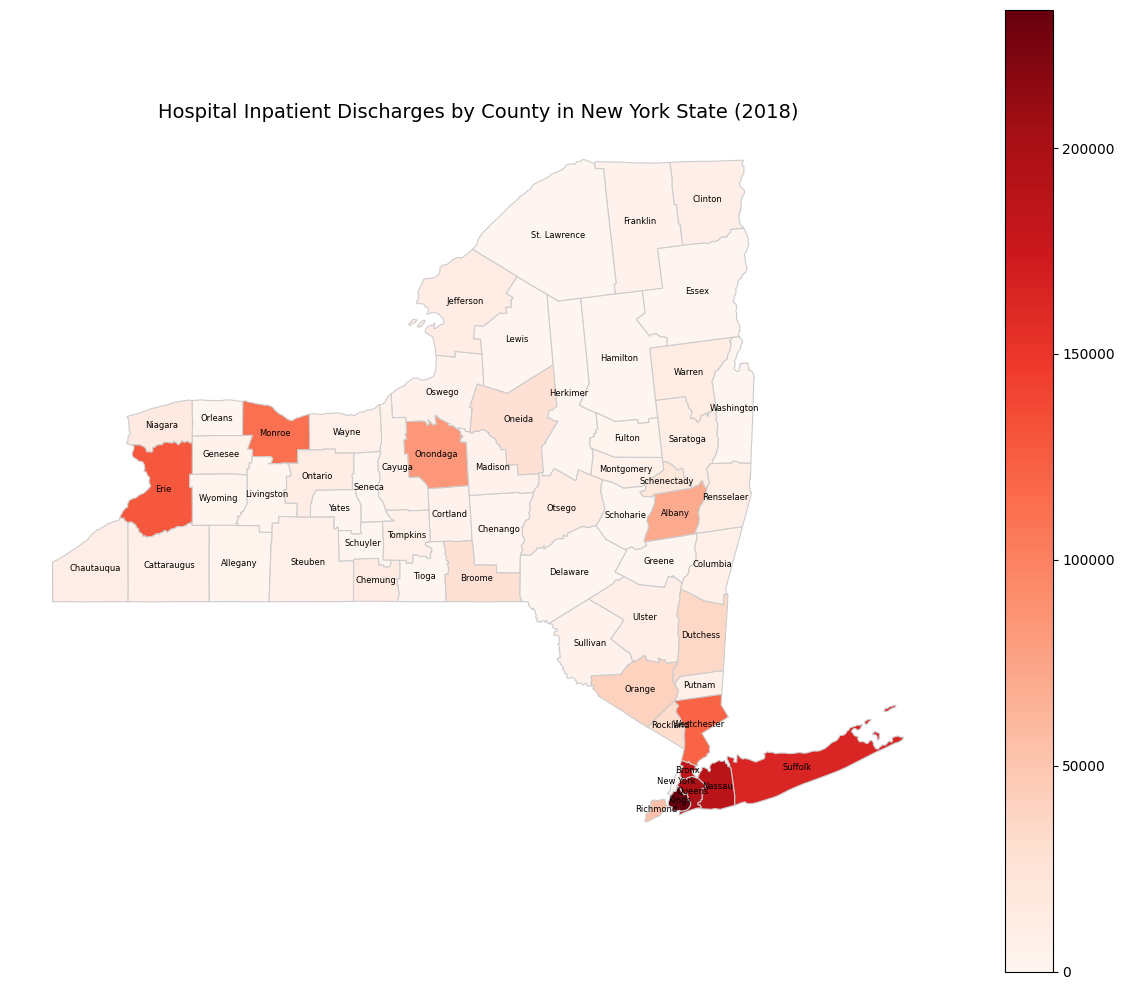

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load shapefile
gdf = gpd.read_file("cb_2022_us_county_5m.shp")

# Step 2: Filter New York State (FIPS = 36)
ny_gdf = gdf[gdf['STATEFP'] == '36'].copy()
## Overall
county_case_counts  = df[df["Year"]==2018]["Hospital County"].value_counts().reset_index()
county_case_counts.columns = ["NAME", "cases"]

# Step 4: Merge and fill missing values
ny_gdf = ny_gdf.merge(county_case_counts, on='NAME', how='left')
ny_gdf['cases'] = ny_gdf['cases'].fillna(0)

# Step 5: Plot map
fig, ax = plt.subplots(figsize=(12, 10))
normalize = Normalize(vmin=ny_gdf['cases'].min(), vmax=ny_gdf['cases'].max())

ny_gdf.plot(
    column='cases',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    norm=normalize
)

# Step 6: Add labels for all counties
for idx, row in ny_gdf.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        row['NAME'],
        fontsize=6,
        ha='center',
        va='center',
        color='black'
    )

# Step 7: Final adjustments
ax.set_title("Hospital Inpatient Discharges by County in New York State (2018)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [26]:
ny_gdf[ny_gdf["NAME"] =="Manhattan"]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,cases


In [23]:
df[df["Year"]==2018]["Hospital County"].value_counts().reset_index()

,Hospital County,count
0,Manhattan,391214
1,Kings,233541
2,Queens,198501
3,Nassau,189363
4,Bronx,185655
5,Suffolk,163853
6,Erie,127724
7,Westchester,120832
8,Monroe,112763
9,Onondaga,83549


In [36]:
df["Payment Typology 1"].unique()

array(['Medicare', 'Self-Pay', 'Blue Cross/Blue Shield', 'Medicaid',
       'Private Health Insurance', 'Federal/State/Local/VA',
       'Miscellaneous/Other', 'Department of Corrections',
       'Managed Care, Unspecified', 'Unknown'], dtype=object)

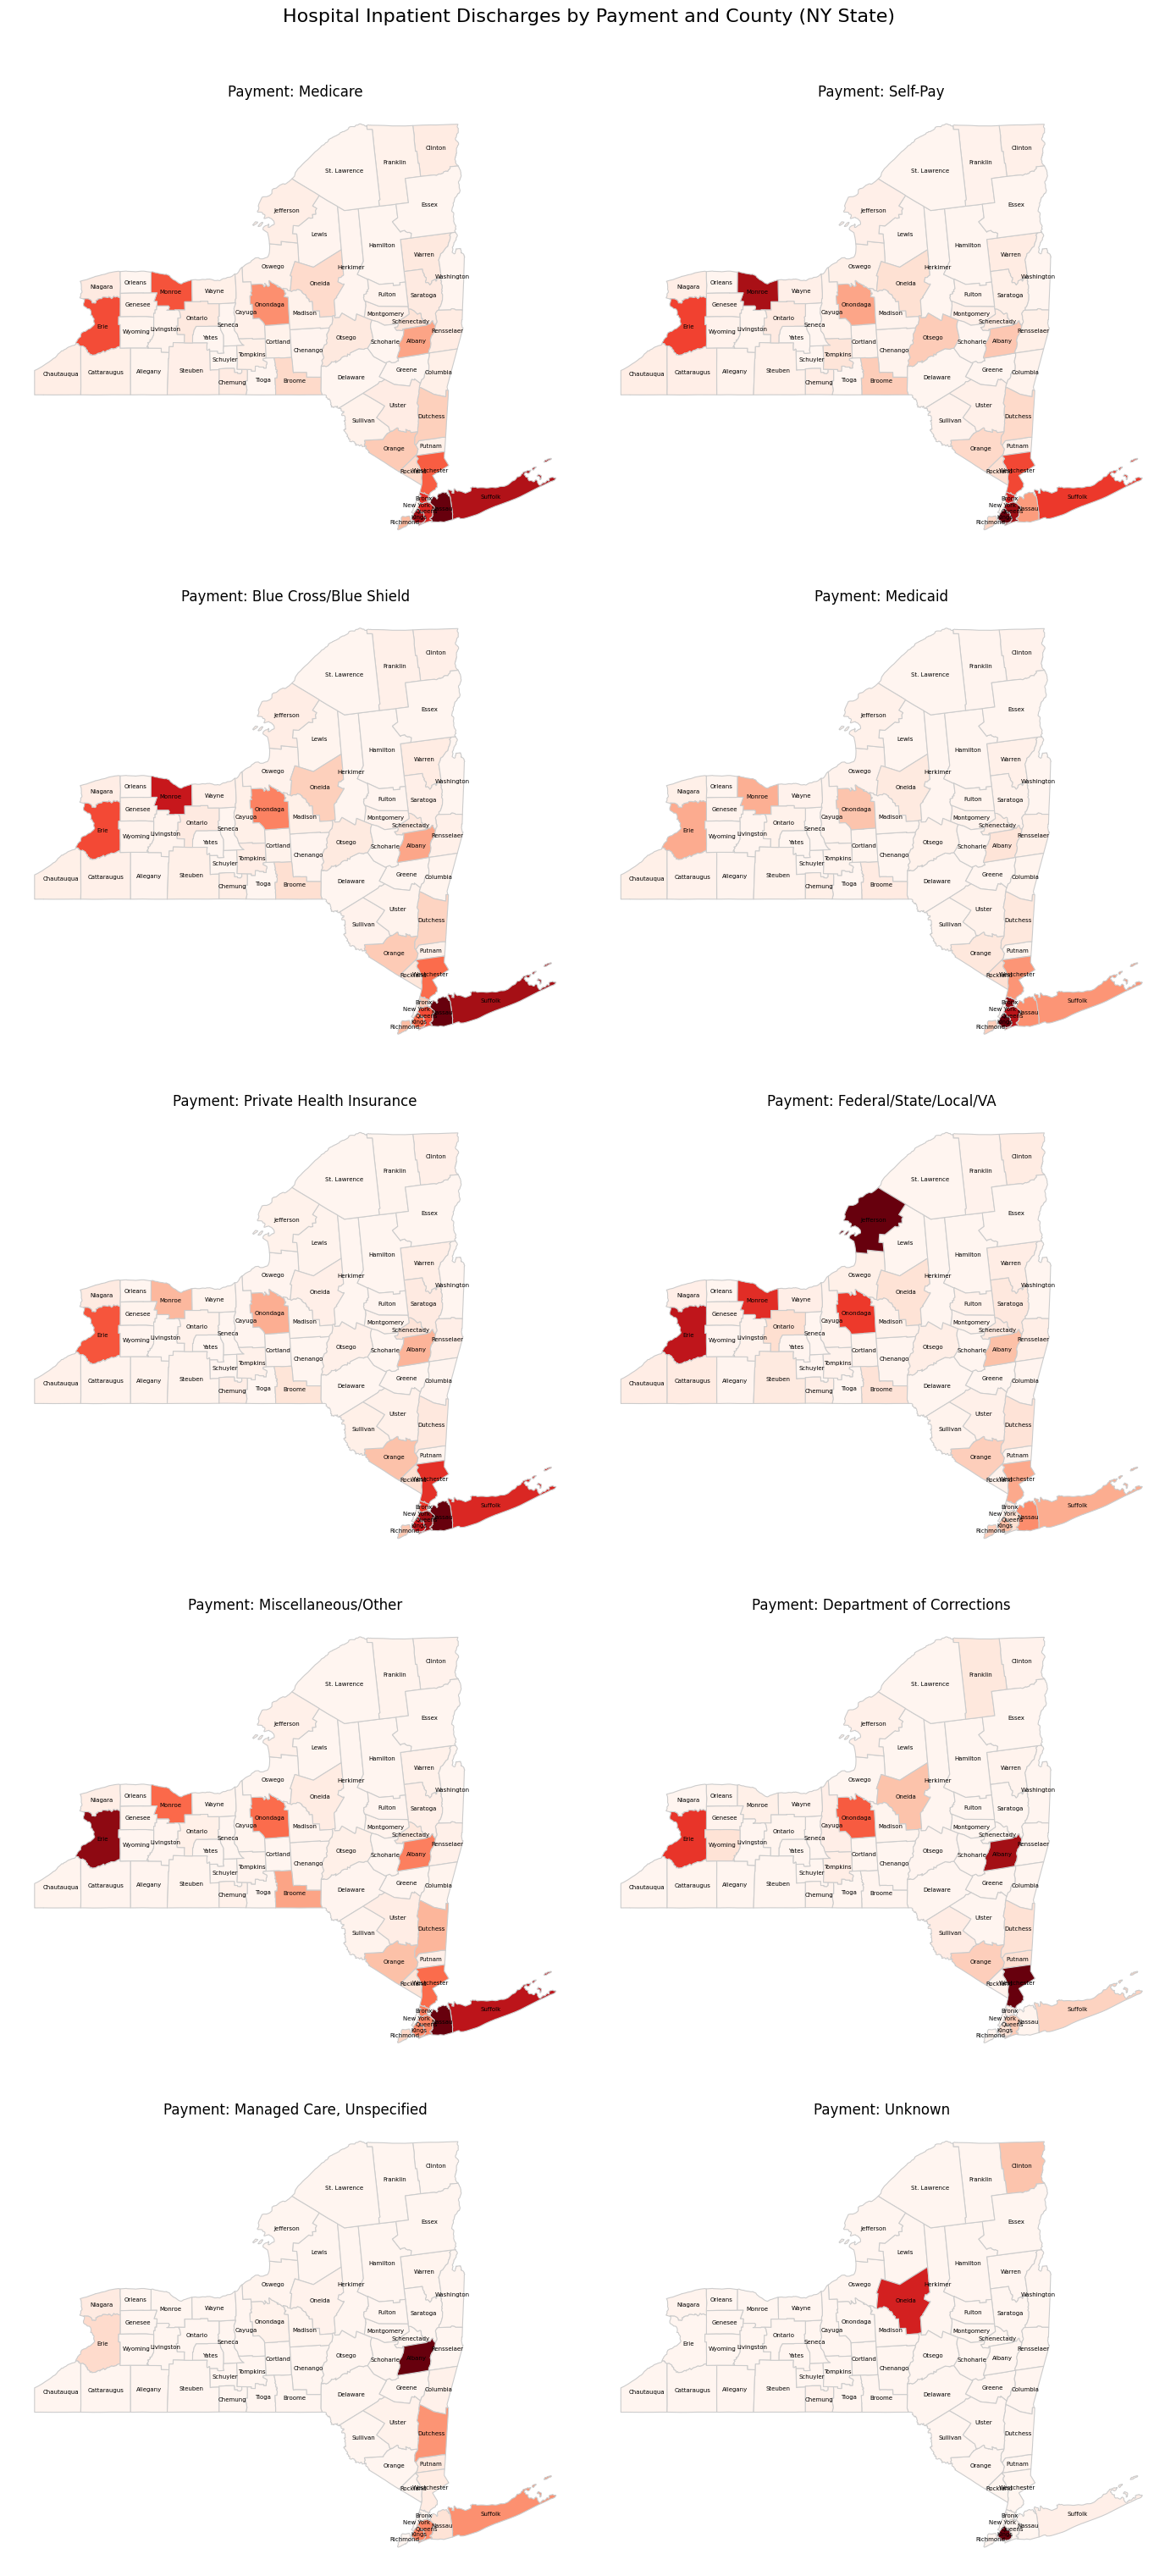

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load shapefile
gdf = gpd.read_file("cb_2022_us_county_5m.shp")
ny_gdf_base = gdf[gdf['STATEFP'] == '36'].copy()

# Unique age groups from your DataFrame
insurance = df["Payment Typology 1"].unique()

# Create subplot grid
n = len(insurance)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()  # Flatten in case of single row

# Loop through each age group
for i, insu in enumerate(insurance):
    ax = axes[i]

    # Filter and count cases
    county_case_counts = df[df["Payment Typology 1"] == insu]["Hospital County"].value_counts().reset_index()
    county_case_counts.columns = ["NAME", "cases"]

    # Merge with shapefile
    ny_gdf = ny_gdf_base.copy()
    ny_gdf = ny_gdf.merge(county_case_counts, on='NAME', how='left')
    ny_gdf['cases'] = ny_gdf['cases'].fillna(0)

    # Normalize color scale
    normalize = Normalize(vmin=ny_gdf['cases'].min(), vmax=ny_gdf['cases'].max())

    # Plot
    ny_gdf.plot(
        column='cases',
        cmap='Reds',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=False,
        norm=normalize
    )

    # Label counties
    for idx, row in ny_gdf.iterrows():
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            row['NAME'],
            fontsize=5,
            ha='center',
            va='center',
            color='black'
        )

    ax.set_title(f"Payment: {insu}", fontsize=12)
    ax.axis('off')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Hospital Inpatient Discharges by Payment and County (NY State)", fontsize=16, y=1.02)
plt.show()


In [4]:
data

Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Length of Stay,Age_Group,Total Charges,Total Costs,Age,Year
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,f64,i64,i64
"""Allegany""","""70 or Older""","""F""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Medicare""","""Private Health Insurance""","""None""",3,4,3913.23,3466.83,4,2016
"""Allegany""","""30 to 49""","""M""","""White""","""Not Span/Hispanic""","""Elective""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Minor""","""Minor""","""Medical""","""Self-Pay""","""None""","""None""",2,2,3597.1,3746.8,2,2016
"""Allegany""","""50 to 69""","""F""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""chronic obstructive pulmonary …","""diseases and disorders of the …","""Minor""","""Minor""","""Medical""","""Medicare""","""Federal/State/Local/VA""","""None""",7,3,9149.22,8322.1,3,2016
"""Allegany""","""70 or Older""","""M""","""White""","""Not Span/Hispanic""","""Urgent""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Medicare""","""Medicaid""","""None""",4,4,5880.61,5828.87,4,2016
"""Allegany""","""50 to 69""","""M""","""White""","""Not Span/Hispanic""","""Elective""","""Home or Self Care""","""other pneumonia""","""diseases and disorders of the …","""Moderate""","""Moderate""","""Medical""","""Blue Cross/Blue Shield""","""None""","""None""",5,3,7019.76,6604.0,3,2016
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Manhattan""","""18 to 29""","""M""","""Other Race""","""Spanish/Hispanic""","""Emergency""","""Home or Self Care""","""hypertension""","""diseases and disorders of the …","""Extreme""","""Major""","""Medical""","""Medicaid""","""None""","""None""",125,1,2.377798e6,892866.0,1,2022
"""Manhattan""","""50 to 69""","""M""","""Other Race""","""Unknown""","""Emergency""","""Home or Self Care""","""septicemia and disseminated in…","""infectious and parasitic disea…","""Major""","""Major""","""Medical""","""Medicaid""","""None""","""None""",21,3,262687.1,236947.7,3,2022
"""Manhattan""","""50 to 69""","""M""","""Other Race""","""Unknown""","""Emergency""","""Short-term Hospital""","""malignancy of hepatobiliary sy…","""diseases and disorders of the …","""Moderate""","""Minor""","""Medical""","""Medicaid""","""None""","""None""",3,3,67719.07,61083.62,3,2022


(array([1.5660122e+07, 8.6660000e+03, 1.1380000e+03, 2.7900000e+02,
        8.6000000e+01, 5.0000000e+01, 1.7000000e+01, 4.0000000e+00,
        4.0000000e+00, 2.0000000e+00]),
 array([       0. ,  1793575.2,  3587150.4,  5380725.6,  7174300.8,
         8967876. , 10761451.2, 12555026.4, 14348601.6, 16142176.8,
        17935752. ]),
 <BarContainer object of 10 artists>)

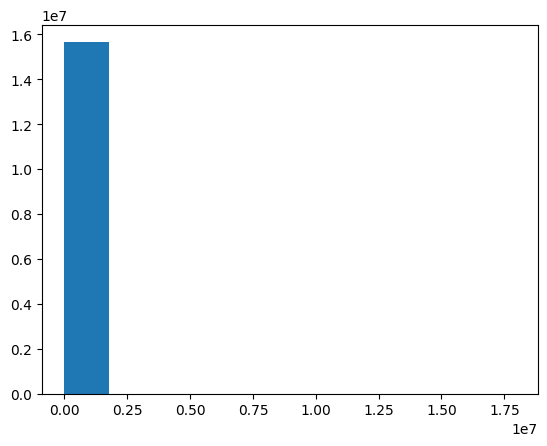

In [5]:
plt.hist(data["Total Charges"])

In [6]:
Q1 = data["Total Charges"].quantile(0.25)
Q3 = data["Total Charges"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data.filter(
    (pl.col("Total Charges") >= lower_bound) & (pl.col("Total Charges") <= upper_bound)
)

print(f"Original shape: {data.shape}")
print(f"Shape after removing outliers: {data_filtered.shape}")

Original shape: (15670368, 21)
Shape after removing outliers: (14270975, 21)


(array([1.5660122e+07, 8.6660000e+03, 1.1380000e+03, 2.7900000e+02,
        8.6000000e+01, 5.0000000e+01, 1.7000000e+01, 4.0000000e+00,
        4.0000000e+00, 2.0000000e+00]),
 array([       0. ,  1793575.2,  3587150.4,  5380725.6,  7174300.8,
         8967876. , 10761451.2, 12555026.4, 14348601.6, 16142176.8,
        17935752. ]),
 <BarContainer object of 10 artists>)

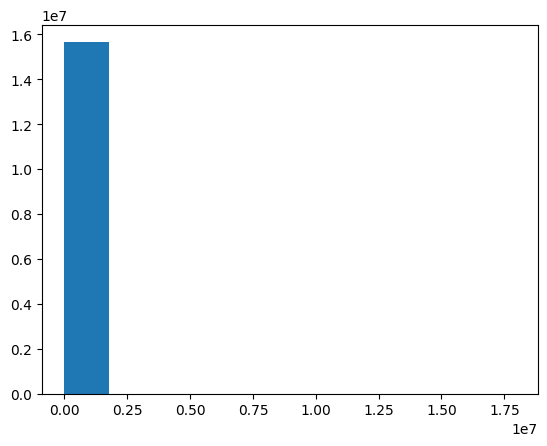

In [7]:
plt.hist(data["Total Charges"])